# 1. Libraries 

# Python

In [1]:
import pandas as pd
import numpy as np
import glob

# Machine Learning

In [2]:
# statistics 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# ML models 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Model Evaluation 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Hyperparameter Tuning 
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# 2. Import Dataset

In [3]:
import glob

list_of_files = glob.glob("../data/raw/*.csv")
df = pd.read_csv(list_of_files[0])

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,track_id,track_name,artist_name,album_name,release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,09CnYHiZ5jGT1wr1TXJ9Zt,Thank You (Not So Bad),"Dimitri Vegas & Like Mike, Tiësto, Dido, W&W, ...",Thank You (Not So Bad),2023-12-01,140000,85,0.673,0.950,11,-5.149,1,0.0488,0.0229,0.082300,0.398,0.563,150.019
1,0h3Xy4V4apMraB5NuM8U7Z,Stumblin' In,CYRIL,Stumblin' In,2023-11-10,213363,88,0.875,0.518,2,-8.388,1,0.0551,0.0638,0.009950,0.125,0.370,126.089
2,331l3xABO0HMr1Kkyh2LZq,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,2024-04-05,149667,89,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.232,0.554,129.976
3,0LMwmV37RCmBO2so0szAFs,Whatever,"Kygo, Ava Max",Whatever,2024-01-19,178273,85,0.580,0.777,3,-5.690,1,0.0655,0.1040,0.000000,0.342,0.589,108.005
4,6BePGk3eCan4FqaW2X8Qy3,10:35,"Tiësto, Tate McRae",10:35,2022-11-03,172252,74,0.696,0.793,8,-5.733,1,0.0970,0.0683,0.000004,0.180,0.698,120.003


# 3. Data Cleaning and Wrangling

In [5]:
# 3.1 shape 
df.shape

(12183, 18)

In [6]:
# 3.2 discription
df.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000
mean,199722.556677,36.509398,0.650359,0.811835,5.442091,-5.616646,0.494131,0.083687,0.083298,0.171796,0.209481,0.416667,128.864055
std,62910.347220,21.000580,0.116416,0.125506,3.597014,2.259134,0.499986,0.073809,0.129156,0.296321,0.158635,0.225096,17.304930
min,0.000000,0.000000,0.148000,0.144000,0.000000,-29.512000,0.000000,0.023100,0.000004,0.000000,0.019400,0.028800,43.708000
25%,159652.500000,23.000000,0.580000,0.736000,2.000000,-6.819000,0.000000,0.041200,0.005700,0.000007,0.099000,0.236000,123.868500
50%,189783.000000,38.000000,0.656000,0.835000,6.000000,-5.395000,0.000000,0.055500,0.027100,0.001920,0.148000,0.398000,127.829000
75%,222458.000000,51.000000,0.731000,0.909000,8.000000,-4.174500,1.000000,0.091600,0.103000,0.199000,0.292000,0.575000,134.009500
max,830625.000000,95.000000,0.979000,1.000000,11.000000,3.554000,1.000000,0.794000,0.945000,0.987000,0.981000,0.981000,230.104000


In [7]:
# 3.3 duplicates 
# 3.3.1 track_id 
column_name = 'track_id'
duplicate_rows = df[df[column_name].duplicated()]

display(duplicate_rows)

,track_id,track_name,artist_name,album_name,release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [8]:
# 3.3.2 track_name 
column_name = 'track_name'
duplicate_rows = df[df[column_name].duplicated()]

df_1 = df.drop_duplicates(subset='track_name')

In [9]:
df_1.shape

(9819, 18)

In [10]:
# 3.4 missing value --> 1 missing value
df_1.isnull().sum()

track_id            0
track_name          1
artist_name         1
album_name          0
release_date        0
duration_ms         0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [11]:
# 2.5 drop missing value and unnamed column 

df_final = df_1.dropna()

df_final.isnull().sum()

track_id            0
track_name          0
artist_name         0
album_name          0
release_date        0
duration_ms         0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9818 entries, 0 to 12182
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          9818 non-null   object 
 1   track_name        9818 non-null   object 
 2   artist_name       9818 non-null   object 
 3   album_name        9818 non-null   object 
 4   release_date      9818 non-null   object 
 5   duration_ms       9818 non-null   int64  
 6   popularity        9818 non-null   int64  
 7   danceability      9818 non-null   float64
 8   energy            9818 non-null   float64
 9   key               9818 non-null   int64  
 10  loudness          9818 non-null   float64
 11  mode              9818 non-null   int64  
 12  speechiness       9818 non-null   float64
 13  acousticness      9818 non-null   float64
 14  instrumentalness  9818 non-null   float64
 15  liveness          9818 non-null   float64
 16  valence           9818 non-null   float64
 17 

In [13]:
# Save the final data
#df_final.to_csv('EU_US_TOP_50_EDM_playlists_tracks_final.csv')

# 4. Classify categorical and numerical

In [14]:
# Extracting columns with object data types to create a categorical dataframe
df_categorical = df_final.select_dtypes("object")
df_numerical = df_final.select_dtypes("number")

In [15]:
df_categorical # track_id, track_name, artist_name, album_name, release_date 5

,track_id,track_name,artist_name,album_name,release_date
0,09CnYHiZ5jGT1wr1TXJ9Zt,Thank You (Not So Bad),"Dimitri Vegas & Like Mike, Tiësto, Dido, W&W, ...",Thank You (Not So Bad),2023-12-01
1,0h3Xy4V4apMraB5NuM8U7Z,Stumblin' In,CYRIL,Stumblin' In,2023-11-10
2,331l3xABO0HMr1Kkyh2LZq,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,2024-04-05
3,0LMwmV37RCmBO2so0szAFs,Whatever,"Kygo, Ava Max",Whatever,2024-01-19
4,6BePGk3eCan4FqaW2X8Qy3,10:35,"Tiësto, Tate McRae",10:35,2022-11-03
...,...,...,...,...,...
12177,1ORp1yoMlfMqlRn83VTB2O,BRAZIL,"HI-LO, Oliver Heldens",BRAZIL,2023-04-28
12179,4D2PtwM3U40QFFBA62I49P,Valodja (Kryder Remix),"Steve Angello, AN21, Kryder",Valodja (Kryder Remix),2023-09-01
12180,4ph6uQL9QoHBrQ1CS8sg6H,The Dom,Will Sparks,Accepted Concept,2023-10-06
12181,6Q27pKlVnjU19BAwa3WChc,Perfect - Edit,TOBEHONEST,Perfect,2023-10-13


In [16]:
df_numerical # duration_ms, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo 13

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,140000,85,0.673,0.950,11,-5.149,1,0.0488,0.02290,0.082300,0.398,0.563,150.019
1,213363,88,0.875,0.518,2,-8.388,1,0.0551,0.06380,0.009950,0.125,0.370,126.089
2,149667,89,0.681,0.714,1,-4.617,0,0.0309,0.03750,0.000000,0.232,0.554,129.976
3,178273,85,0.580,0.777,3,-5.690,1,0.0655,0.10400,0.000000,0.342,0.589,108.005
4,172252,74,0.696,0.793,8,-5.733,1,0.0970,0.06830,0.000004,0.180,0.698,120.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12177,212840,32,0.636,0.950,0,-6.420,1,0.0396,0.03090,0.891000,0.172,0.429,132.015
12179,170170,29,0.825,0.910,8,-4.535,1,0.2030,0.37100,0.102000,0.522,0.190,127.992
12180,200683,25,0.632,0.954,2,-4.676,1,0.0651,0.00171,0.904000,0.268,0.123,127.983
12181,165000,19,0.786,0.811,1,-6.457,1,0.0574,0.00328,0.007430,0.350,0.434,128.021


# 5. Feature Engineering

# 5.1  Correlation of popularity and audio features 

* The popularity of a track is a value between 0 and 100, with 100 being the most popular, which is calculated by algorithm and is based, in the most part, on the total number of plays the
track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

In the context of Spotify's recommendation system, popularity plays a crucial role. Spotify's algorithms use a combination of user listening data, playlists, and other behavioral signals to generate personalized recommendations. Popular tracks and artists are often recommended to users because they are more likely to appeal to a broader audience. This is based on the assumption that popular music has a higher probability of being enjoyed by many listeners.

# Hypothesis Testing - 11 'audio features' to 'popularity'

H0: there is no significant difference in the effect of all audio features on popularity.

H1: there is a significant difference in the effect of at least one audio feature on popularity.

In [17]:
# ANOVA

from scipy.stats import f_oneway

# 11 audio features(int) and Y popularity
A = df_final['danceability']
B = df_final['energy']
C = df_final['key']
D = df_final['loudness']
E = df_final['mode']
F = df_final['speechiness']
G = df_final['acousticness']
H = df_final['instrumentalness']
I = df_final['liveness']
J = df_final['valence']
K = df_final['tempo']

Y = df['popularity']

# Variance analysis 
f_statistic, p_value = f_oneway(A, B, C)

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 16806.479120359974
P-value: 0.0


# 5.2 Statistical analysis of X 11 audio features and Y popularity

In [18]:
import statsmodels.api as sm

X = df_final[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df_final['popularity'] 

In [19]:
# constant columns (intercepts)
X = sm.add_constant(X)

# Creating a linear regression model
model = sm.OLS(y, X)

results = model.fit()

# Coefficients and P-values 
coefficients = results.params
p_values = results.pvalues

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     22.11
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.93e-45
Time:                        11:55:53   Log-Likelihood:                -43607.
No. Observations:                9818   AIC:                         8.724e+04
Df Residuals:                    9806   BIC:                         8.733e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.1114      2.935      9.578      0.000      22.358      33.864
danceability        12.0757      2.017      5.986      0.000       8.121      16.030
energy              -0.9870      2.127     -0.464      0.643      -5.157       3.183
key                 -0.0639      0.058     -1.093      0.275      -0.179       0.051
loudness             0.5654      0.114      4.951      0.000       0.342       0.789
mode                 0.3152      0.422      0.747      0.455      -0.511       1.142
speechiness          0.6313      2.887      0.219      0.827      -5.028       6.290
acousticness        13.9536      1.695      8.230      0.000      10.630      17.277
instrumentalness    -3.0161      0.747     -4.037      0.000      -4.480      -1.552
liveness            -3.3381      1.341     -2.489      0.013      -5.967      -0.709
valence              4.6624      1.026      4.546      0.000       2.652       6.673
tempo                0.0247      0.012      1.996      0.046       0.000       0.049
==============================================================================
Omnibus:                      326.203   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.662
Skew:                          -0.206   Prob(JB):                     1.20e-43
Kurtosis:                       2.440   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 H0 accepted！ 
 TOP features 

 Significant: danceability; acousticness; valence; liveness; instrumentalness
 Not significant:  loudness; tempo; key; energy; mode; speechiness 

 1. Coefficients>1 2. # 2. P-values <0.05 

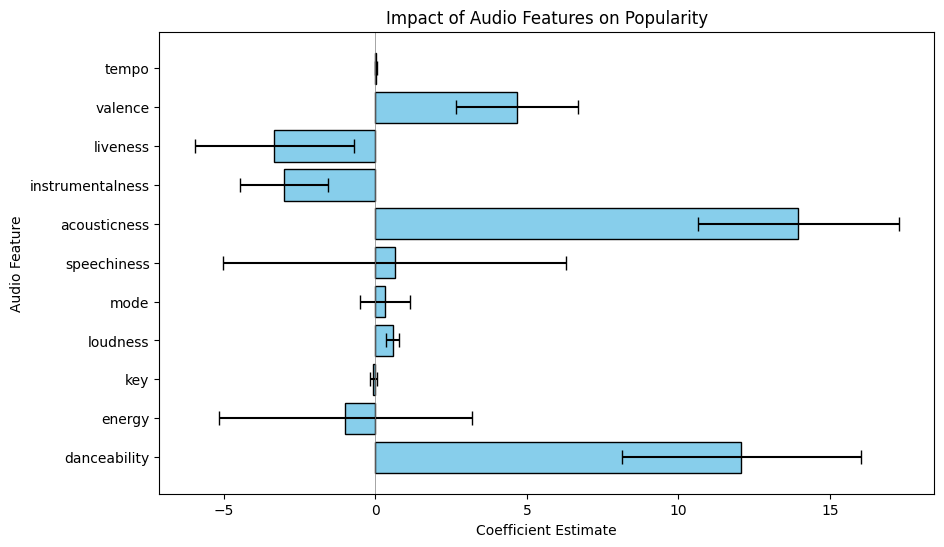

In [20]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']

# feature coefficient 
coefficients = [12.0757, -0.9870, -0.0639, 0.5654, 0.3152, 
                0.6313, 13.9536, -3.0161, -3.3381, 4.6624, 0.0247]

# conifidence interval 
ci_lower = [8.121, -5.157, -0.179, 0.342, -0.511, 
            -5.028, 10.630, -4.480, -5.967, 2.652, 0.000]
ci_upper = [16.030, 3.183, 0.051, 0.789, 1.142, 
            6.290, 17.277, -1.552, -0.709, 6.673, 0.049]

# boxploy 
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(features, coefficients, xerr=(np.array(coefficients) - np.array(ci_lower), np.array(ci_upper) - np.array(coefficients)), 
        capsize=5, align='center', color='skyblue', edgecolor='black')

ax.set_title('Impact of Audio Features on Popularity')
ax.set_xlabel('Coefficient Estimate')
ax.set_ylabel('Audio Feature')
ax.axvline(x=0, color='gray', linewidth=0.5)  

# plt.savefig('Impact of Audio Features on Popularity', dpi=300)

plt.show()

# 6. Feature Selection

In [21]:
# features based on high-related to popularity 
features = ['danceability','acousticness', 'instrumentalness', 'liveness', 'valence']  

In [22]:
X = df_final[features]

In [23]:
# Feature standaization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Base de músicas: ", X_scaled[0,:])

Base de músicas:  [ 0.17922114 -0.46061248 -0.32777794  1.19950658  0.63746557]


In [24]:
columns_to_cluster_scaled = ['danceability_scaled', 'acousticness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled']

df_songs_scaled = pd.DataFrame(X_scaled, columns=columns_to_cluster_scaled)

#df_songs_scaled

# 7. Machine Learning Model --> Clustering

# 7.1 KMean 

# 7.1.1 Training the model

In [25]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# add labels into dataframe 
df_final['cluster'] = labels

C:\Users\chuan\AppData\Local\Temp\ipykernel_1964\815396669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = labels


In [26]:
# try different number of clustering 
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_scores[-1]}')

Number of clusters: 2, Silhouette Score: 0.19375604269713528
Number of clusters: 3, Silhouette Score: 0.19909345074975598
Number of clusters: 4, Silhouette Score: 0.23720246143321097
Number of clusters: 5, Silhouette Score: 0.2629938078904257
Number of clusters: 6, Silhouette Score: 0.21703586804830247
Number of clusters: 7, Silhouette Score: 0.21651330919147585
Number of clusters: 8, Silhouette Score: 0.2183287553111861
Number of clusters: 9, Silhouette Score: 0.21332454520535876
Number of clusters: 10, Silhouette Score: 0.20796953693676004


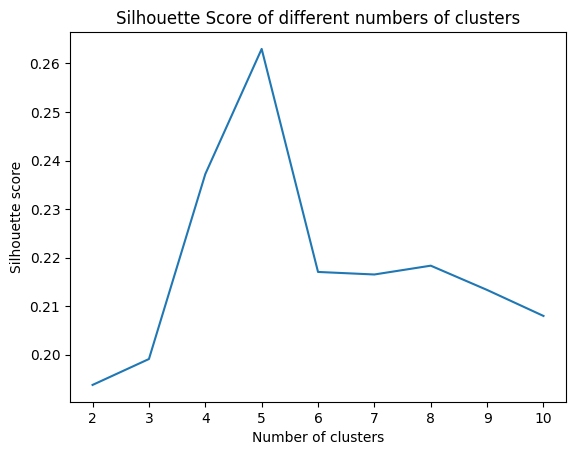

In [27]:
# Silhouette score plot
fig, axes = plt.subplots()
axes.plot(np.arange(2,11), silhouette_scores)
axes.set_xlabel("Number of clusters")
axes.set_ylabel("Silhouette score")
plt.title('Silhouette Score of different numbers of clusters')

# plt.savefig('Silhouette Score of different numbers of clusters', dpi=300)

# 7.1.2  Fixing the number of clusters with the optimal value = 5

In [28]:
k=5

model = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
pred = model.predict(X_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [1 2 2 1 2 0 2 3 2 0]


# Visualizing the clusters

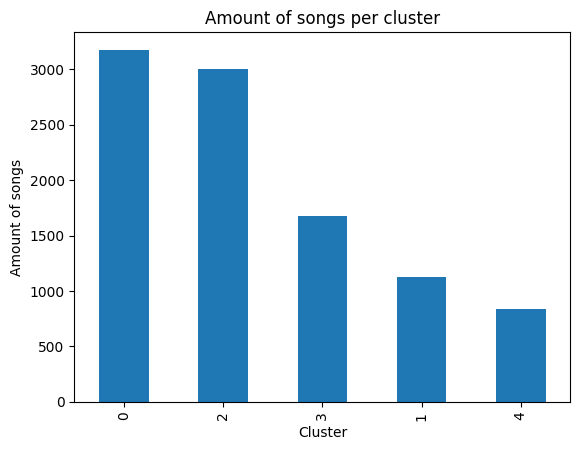

In [29]:
# Amount of songs per cluster

df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')

# plt.savefig('Amount of songs per cluster', dpi=300)
plt.show()

In [30]:
display(df_songs_scaled['cluster'].value_counts())
minor_cluster = df_songs_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

cluster
0    3177
2    3005
3    1673
1    1125
4     838
Name: count, dtype: int64

Amount of songs in the smallest cluster:  838


C:\Users\chuan\AppData\Local\Temp\ipykernel_1964\3725522504.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))


# Radar chart from each cluster

In [31]:
rename_columns = dict(zip(columns_to_cluster_scaled, features))

df_radar = df_songs_scaled.groupby('cluster')[columns_to_cluster_scaled].mean().reset_index().rename(columns=rename_columns)
df_radar

,cluster,danceability,acousticness,instrumentalness,liveness,valence
0,0,-0.723014,-0.263699,-0.462288,-0.237869,-0.634376
1,1,-0.174428,-0.234546,-0.297242,2.069728,-0.011930
2,2,0.691547,-0.186638,-0.427538,-0.323813,0.877643
3,3,0.200032,-0.339472,1.898272,-0.240637,-0.326590
4,4,0.096057,2.661599,-0.104977,-0.235194,-0.074102


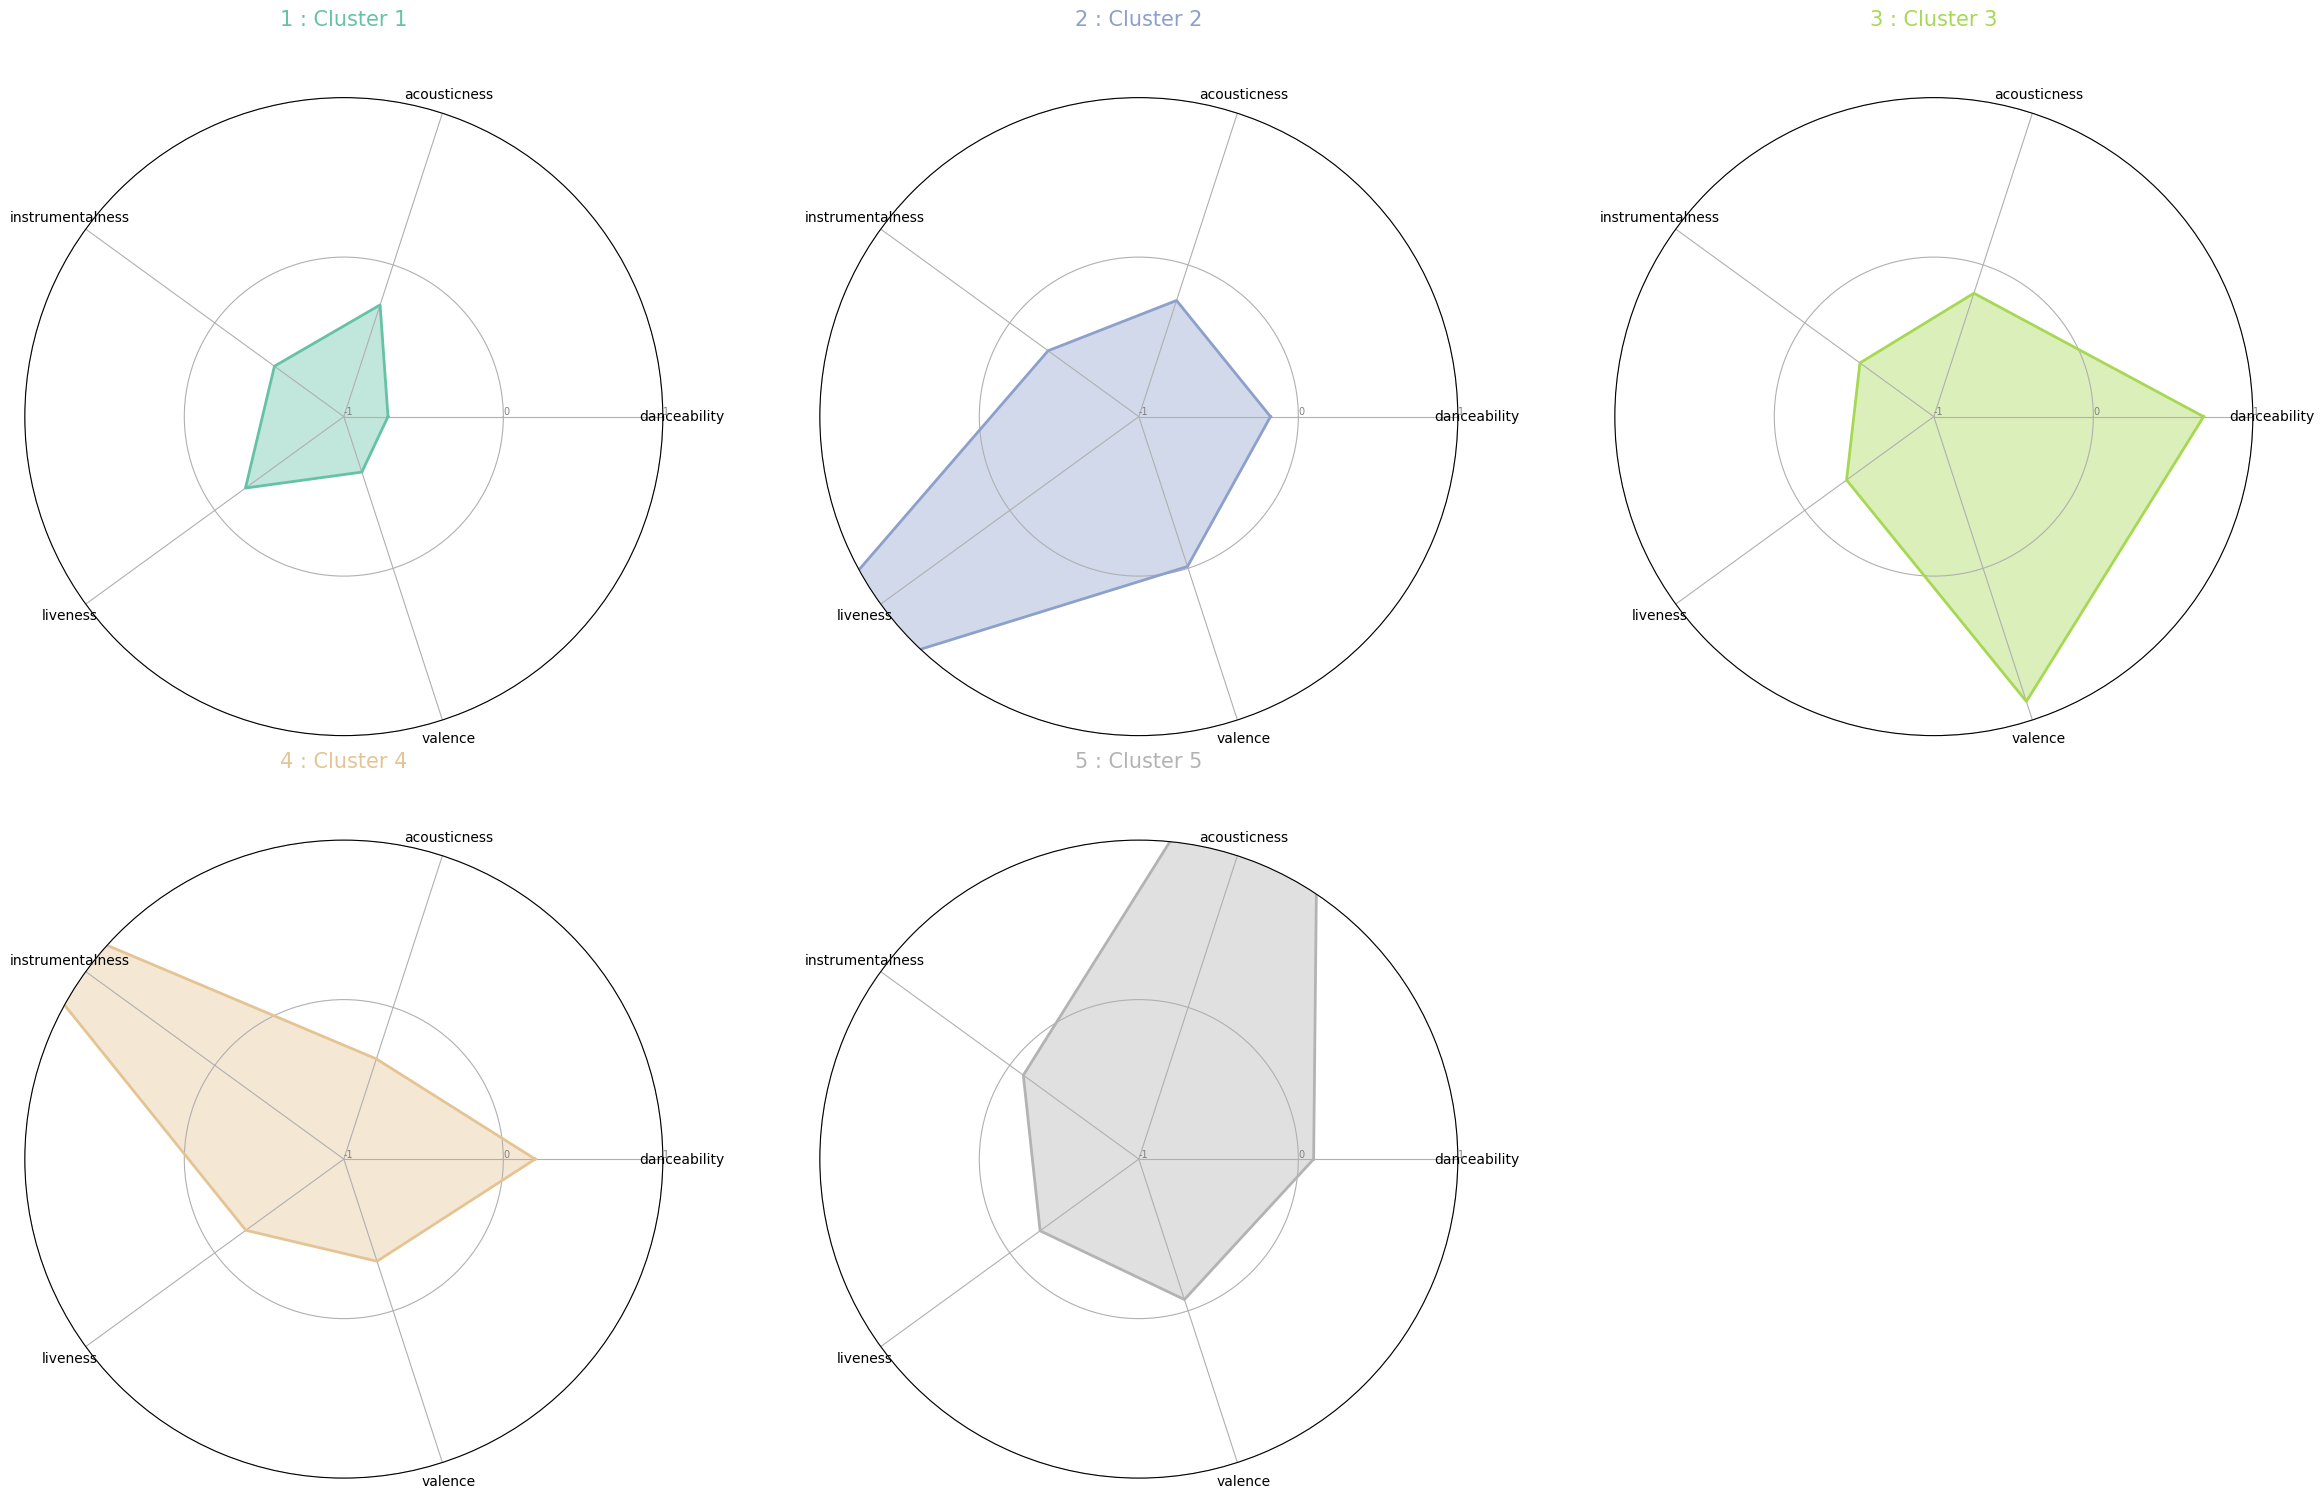

In [32]:
# Radar chart visualisation
df_radar = pd.DataFrame({
    'cluster': [1, 2, 3, 4, 5],
    'danceability': [-0.723014, -0.174428, 0.691547, 0.200032, 0.096057],
    'acousticness': [-0.263699, -0.234546, -0.186638, -0.339472, 2.661599],
    'instrumentalness': [-0.462288, -0.297242, -0.427538, 1.898272, -0.104977],
    'liveness': [-0.237869, 2.069728, -0.323813, -0.240637, -0.235194],
    'valence': [-0.634376, -0.011930, 0.877643, -0.326590, -0.074102]
})

# Define the make_radar function (assumed to be defined elsewhere in your code)
def make_radar(row, title, color, dframe, num_clusters):
    # Number of variables we're plotting.
    categories = list(dframe.columns[1:])  # Assuming first column is 'cluster'
    N = len(categories)

    # What will be the angle of each axis in the plot?
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2, 3, row + 1, polar=True)

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories)

    # Draw y-labels
    ax.set_rlabel_position(0)
    plt.yticks([-1, 0, 1], ["-1", "0", "1"], color="grey", size=7)
    plt.ylim(-1, 1)

    # Values to plot for this cluster
    values = dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]

    # Plot data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=15, color=color, y=1.1)

# Initialize the figure
plt.figure(figsize=(24, 15))

# Create a color palette
my_palette = plt.get_cmap("Set2", len(df_radar.index))

# Create cluster name list (replace with your actual cluster names if needed)
title_list = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Loop to plot each radar chart
for row in range(len(df_radar.index)):
    make_radar(
        row=row,
        title=f"{df_radar['cluster'][row]} : {title_list[row]}",
        color=my_palette(row),
        dframe=df_radar,
        num_clusters=len(df_radar.index)
    )

# Show the plot
plt.tight_layout()
# plt.savefig('Radar Charts of different clusters.png', dpi=300)

plt.show()

## PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X)
# Save the transformer with pickle
np.cumsum(pca.explained_variance_ratio_)

pca2 = PCA(n_components=3)
X_pca_np = pca2.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca_np, columns=['PCA1', 'PCA2', 'PCA3'], index=X.index)
X_pca_df['cluster'] = model.labels_
X_pca_df

,PCA1,PCA2,PCA3,cluster
0,-0.133918,0.110011,0.200144,1
1,-0.150705,-0.014893,-0.110876,2
2,-0.206502,0.096055,0.030194,2
3,-0.220934,0.094950,0.137786,1
4,-0.237217,0.238084,-0.016491,2
...,...,...,...,...
12177,0.690894,0.155542,0.011461,3
12179,-0.043342,-0.200245,0.216556,4
12180,0.768750,-0.135039,0.087999,3
12181,-0.174781,0.007284,0.132586,2


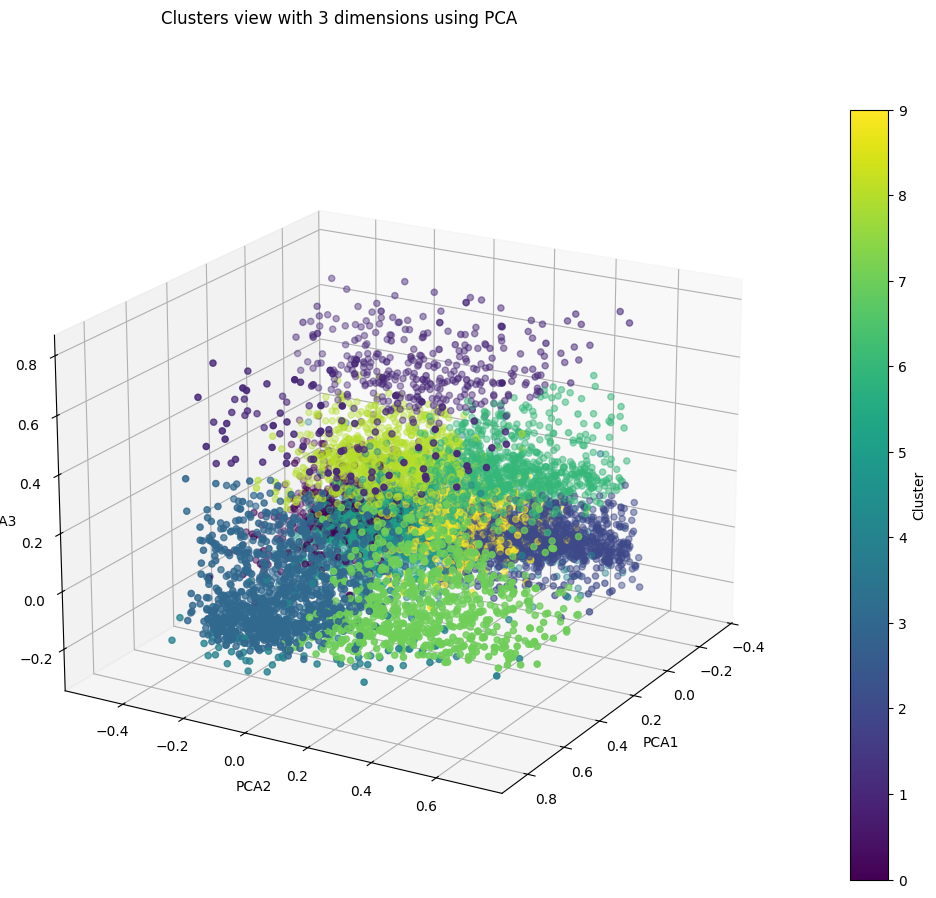

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizing clusters in 3 dimensions
fig = plt.figure(figsize=(18, 10)) 
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

sc = ax.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], X_pca_df['PCA3'], c=labels, cmap='viridis')

# Add a color bar
cb = plt.colorbar(sc, ax=ax)
cb.set_label('Cluster')

# Adjusting the view angle for better visualization
ax.view_init(elev=20, azim=30)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

## ISOMAP

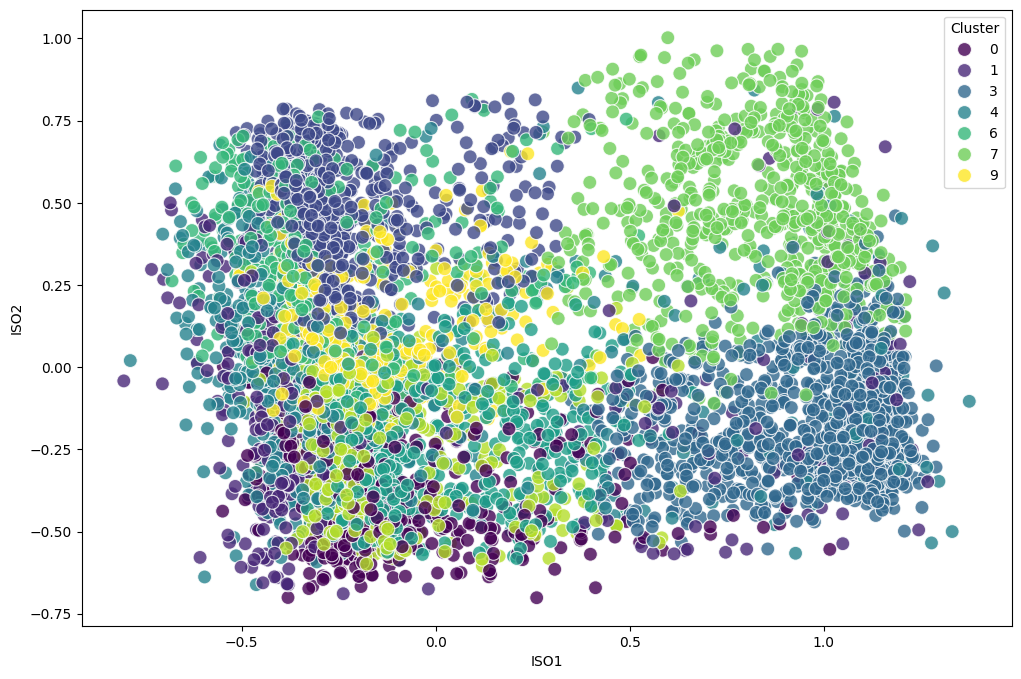

In [35]:
# Isomap transformation
isomap = Isomap(n_components=2)
X_isomap_np = isomap.fit_transform(X)
X_isomap_df = pd.DataFrame(X_isomap_np, columns=['ISO1', 'ISO2'], index=X.index)

# Create a DataFrame that includes labels for coloring
X_isomap_df['label'] = labels

# Plotting
plt.figure(figsize=(12, 8))  
scatter_plot = sns.scatterplot(data=X_isomap_df, x='ISO1', y='ISO2', hue='label', palette='viridis', s=100, alpha=0.8)

# Add a legend
plt.legend(title='Cluster')

# Axis labels
plt.xlabel('ISO1')
plt.ylabel('ISO2')

# Show plot
plt.show()

# 7.3 Hierarchical clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering 
hc = AgglomerativeClustering(n_clusters=10)
labels = hc.fit_predict(X_scaled)

# Model Evaluation

In [37]:
# 1. Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f'Agglomerative Clustering Silhouette Score: {score}')

Agglomerative Clustering Silhouette Score: 0.1396224835394923


In [38]:
# 2. Calinski-Harabasz
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {ch_score}")

Calinski-Harabasz Score: 1625.5765666142797


In [39]:
# 3. Davies-Bouldin
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 1.4899081485383596


# 7.4 DBSCAN

In [40]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Model Evaluation

In [41]:
# 1. Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f'DBSCAN Silhouette Score: {score}')

DBSCAN Silhouette Score: -0.2277411395172118


In [42]:
# 2. Calinski-Harabasz
ch_score = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {ch_score}")

Calinski-Harabasz Score: 50.07796132316413


In [43]:
# 3. Davies-Bouldin
db_score = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 1.3027662259286663


# 8. Test recommendation functions 

# 8.1 Reconmmendation by track and artist in the dataset

In [44]:
def find_song_id(track_name, artist_name):
    track = df_final[(df_final['track_name'].str.lower() == track_name.lower()) & (df_final['artist_name'].str.lower().str.contains(artist_name.lower()))]
    if not track.empty:
        return track.iloc[0]['track_id']
    else:
        return None

In [45]:
# 5.3 Reconmmend functions 

def recommend_songs(track_name, artist_name, num_recommendations=5):
    # find track_id by artist and track_name 
    song_id = find_song_id(track_name, artist_name)
    if song_id is None:
        return pd.DataFrame(), "Song not found in the dataset."
    
    # find song index and features
    song_index_list = df_final.index[df_final['track_id'] == song_id].tolist()
    if not song_index_list:
        return pd.DataFrame(), "Song index not found in the dataset."
    
    song_index = song_index_list[0]
    if song_index >= len(X_scaled):
        return pd.DataFrame(), "Song index is out of bounds for the feature matrix."
    
    song_features = X_scaled[song_index].reshape(1, -1)
    song_cluster = df_final.loc[song_index, 'cluster']

    # find the tracks in the same cluster 
    cluster_songs = df_final[df_final['cluster'] == song_cluster]
    
    # align indices for the scaled features
    cluster_songs_scaled = X_scaled[df_final['cluster'] == song_cluster]
    
    # calculating cosine similarity
    similarities = cosine_similarity(song_features, cluster_songs_scaled)
    similarity_scores = list(enumerate(similarities[0]))

    # orders by similarity
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # results 
    recommendations = [cluster_songs.iloc[i[0]] for i in similarity_scores[1:num_recommendations + 1]]
    return pd.DataFrame(recommendations), None

In [ ]:
# test by name and artist 
track_name = ""
artist_name = ""
recommended_songs, error = recommend_songs(track_name, artist_name)
if error:
    print(error)
else:
    display(recommended_songs[['track_name', 'artist_name', 'album_name', 'release_date']])

In [47]:
# test by name and artist 
track_name = "Blinding Lights"
artist_name = "The Weeknd"
recommended_songs, error = recommend_songs(track_name, artist_name)
if error:
    print(error)
else:
    display(recommended_songs[['track_name', 'artist_name', 'album_name', 'release_date']])

Song not found in the dataset.


In [48]:
# test by name and artist 
track_name = "Wake Me Up"
artist_name = "Avicii"
recommended_songs, error = recommend_songs(track_name, artist_name)
if error:
    print(error)
else:
    display(recommended_songs[['track_name', 'artist_name', 'album_name', 'release_date']])

,track_name,artist_name,album_name,release_date
7058,Follow Me (feat. Jason Derulo) - Bingo Players...,"Hardwell, Jason Derulo, Bingo Players",United We Are (Remixed),2015-12-04
4934,"Devil (feat. Busta Rhymes, B.o.B & Neon Hitch)","Cash Cash, Busta Rhymes, B.o.B, Neon Hitch","Devil (feat. Busta Rhymes, B.o.B & Neon Hitch)",2015-08-07
3503,Under The Water,Camden Cox,Under The Water,2021-02-19
10434,Lost In Sound,ROY KNOX,Lost In Sound,2019-03-23
430,Better,Sonny Fodera,Better,2022-06-10


# 7.2 Reconmmendation by audio feature which is not in the dataset

In [49]:
def recommend_songs_with_features(track_id, song_features, df, X_scaled, num_recommendations=5):
    # Check if the input song is already in the dataset
    if track_id in df['track_id'].values:
        return pd.DataFrame(), "Song already in the dataset. Use the standard recommendation function."

    # Ensure song_features is a numpy array
    song_features = song_features.reshape(1, -1)
    
    # Calculate cosine similarity between the input song and all songs in the dataset; Features = ['danceability','acousticness', 'instrumentalness', 'liveness', 'valence']  
    similarities = cosine_similarity(features, X_scaled)
    similarity_scores = list(enumerate(similarities[0]))
    
    # Sort by similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top num_recommendations songs
    recommendations = [df.iloc[i[0]] for i in similarity_scores[:num_recommendations]]
    
    return pd.DataFrame(recommendations), None

# Example usage
track_id = "5SuOikwiRyPMVoIQDJUgSV"
features = np.array([0.676, 0.0322, 0.99, 0.358, 0.715])  # Example features

recommended_songs, error = recommend_songs_with_features(track_id, song_features, df_final, X_scaled)
if error:
    print(error)
else:
    display(recommended_songs[['track_name', 'artist_name', 'album_name', 'release_date']])

NameError: name 'song_features' is not defined